In [1]:
import numpy as np
import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import *
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
train_path='/Users/sahaajsinghchawla/Desktop/SAHAAJ/imagecl/train'

In [3]:
train_batch=ImageDataGenerator().flow_from_directory(train_path,
                                                    target_size=(224,224), 
                                                    batch_size=17,
                                                    classes=['cars','not'])

Found 1671 images belonging to 2 classes.


In [4]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


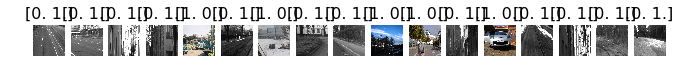

In [5]:
imgs,labels=next(train_batch)
plots(imgs,titles=labels)

In [6]:
vgg16_model=keras.applications.vgg16.VGG16()

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [8]:
model=Sequential()
for layers in vgg16_model.layers:
    model.add(layers)

In [9]:
for layers in model.layers:
    layers.trainable= False

In [10]:
model.add(Dense(2,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [11]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [13]:
model.fit_generator(train_batch,steps_per_epoch=104,epochs=10,verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 560s - loss: 0.6890 - acc: 0.6205
Epoch 2/10
 - 551s - loss: 0.6818 - acc: 0.7130
Epoch 3/10
 - 551s - loss: 0.6750 - acc: 0.7343
Epoch 4/10
 - 551s - loss: 0.6688 - acc: 0.7226
Epoch 5/10
 - 551s - loss: 0.6610 - acc: 0.7291
Epoch 6/10
 - 552s - loss: 0.6553 - acc: 0.7226
Epoch 7/10
 - 991s - loss: 0.6488 - acc: 0.7183
Epoch 8/10
 - 553s - loss: 0.6430 - acc: 0.7128
Epoch 9/10
 - 553s - loss: 0.6420 - acc: 0.6989
Epoch 10/10
 - 552s - loss: 0.6349 - acc: 0.6977


In [14]:
test_path='/Users/sahaajsinghchawla/Desktop/SAHAAJ/test'
test_batch=ImageDataGenerator().flow_from_directory(test_path,
                             target_size=(224,224),
                             batch_size=10,
                            classes=['cars','not'])

Found 924 images belonging to 2 classes.


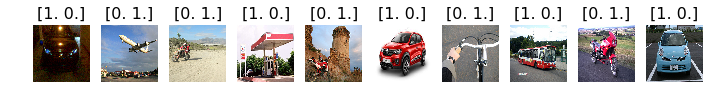

In [15]:
test_imgs,testlabel=next(test_batch)
plots(test_imgs,titles=testlabel)

In [16]:
pred=model.predict_generator(test_batch,steps=1,verbose=0)
testlabel=testlabel[:,0]

In [18]:
pred=pred[:,0]

IndexError: too many indices for array

In [19]:
for i in testlabel:
    print(i)
print('---')
for i in pred:
    print(i)

1.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
---
0.4360983
0.48255754
0.45897856
0.45808798
0.43435282
0.498403
0.44980416
0.43115672
0.45876884
0.43006873


cm

In [20]:
cm=confusion_matrix(testlabel,np.round(pred))
cm

array([[5, 0],
       [5, 0]])

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 0]
 [5 0]]


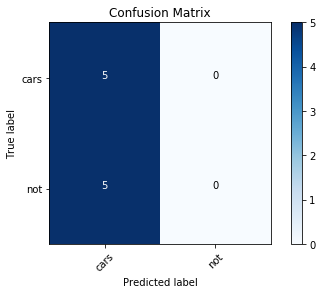

In [22]:
cm_plot_label=['cars','not']
plot_confusion_matrix(cm,cm_plot_label,title='Confusion Matrix')

In [23]:
model.save

<bound method Network.save of <keras.engine.sequential.Sequential object at 0x1a67432cf8>>

In [27]:
model.save('final_model2.h5')